In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
TRAIN_DIR = r"C:\Users\rithi\Downloads\Soft computing Project Resouces\skin_train"
TEST_DIR = r"C:\Users\rithi\Downloads\Soft computing Project Resouces\skin_test"

# Check if directories exist
print("[STATUS] Checking dataset directories...")
print(f"Train directory exists: {os.path.exists(TRAIN_DIR)}")
print(f"Test directory exists: {os.path.exists(TEST_DIR)}")

# Define image dimensions
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for Test (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
print("\n[STATUS] Loading training data...")
train_ds = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("\n[STATUS] Loading test data...")
test_ds = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Verify class indices
print("\n[STATUS] Class Indices:", train_ds.class_indices)

[STATUS] Checking dataset directories...
Train directory exists: True
Test directory exists: True

[STATUS] Loading training data...
Found 13385 images belonging to 4 classes.

[STATUS] Loading test data...
Found 2330 images belonging to 4 classes.

[STATUS] Class Indices: {'Benign': 0, 'Malignant': 1, 'insect_bite': 2, 'no_bites': 3}


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define model
print("\n[STATUS] Building model...")
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train model
print("\n[STATUS] Training model...")
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint]
)

print("\n[STATUS] Training completed!")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")


[STATUS] Building model...


C:\Users\rithi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



[STATUS] Training model...


C:\Users\rithi\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6332 - loss: 0.8665   

419/419 ━━━━━━━━━━━━━━━━━━━━ 1416s 3s/step - accuracy: 0.6333 - loss: 0.8662 - val_accuracy: 0.6833 - val_loss: 0.7187
Epoch 2/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7347 - loss: 0.6540   

419/419 ━━━━━━━━━━━━━━━━━━━━ 1062s 3s/step - accuracy: 0.7347 - loss: 0.6540 - val_accuracy: 0.8004 - val_loss: 0.5539
Epoch 3/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 6978s 17s/step - accuracy: 0.7574 - loss: 0.6064 - val_accuracy: 0.7442 - val_loss: 0.6476
Epoch 4/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 725s 2s/step - accuracy: 0.7786 - loss: 0.5609 - val_accuracy: 0.7579 - val_loss: 0.6600
Epoch 5/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7792 - loss: 0.5570   

419/419 ━━━━━━━━━━━━━━━━━━━━ 889s 2s/step - accuracy: 0.7792 - loss: 0.5569 - val_accuracy: 0.7931 - val_loss: 0.5279
Epoch 6/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7954 - loss: 0.5222   

419/419 ━━━━━━━━━━━━━━━━━━━━ 805s 2s/step - accuracy: 0.7954 - loss: 0.5222 - val_accuracy: 0.8605 - val_loss: 0.3983
Epoch 7/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8111 - loss: 0.4822   

419/419 ━━━━━━━━━━━━━━━━━━━━ 862s 2s/step - accuracy: 0.8111 - loss: 0.4823 - val_accuracy: 0.8648 - val_loss: 0.3911
Epoch 8/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 773s 2s/step - accuracy: 0.8123 - loss: 0.4882 - val_accuracy: 0.7961 - val_loss: 0.4959
Epoch 9/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 776s 2s/step - accuracy: 0.8225 - loss: 0.4430 - val_accuracy: 0.8112 - val_loss: 0.5079
Epoch 10/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 849s 2s/step - accuracy: 0.8272 - loss: 0.4403 - val_accuracy: 0.8189 - val_loss: 0.4986
Epoch 11/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8346 - loss: 0.4158   

419/419 ━━━━━━━━━━━━━━━━━━━━ 805s 2s/step - accuracy: 0.8346 - loss: 0.4158 - val_accuracy: 0.8918 - val_loss: 0.3556
Epoch 12/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8435 - loss: 0.4010   

419/419 ━━━━━━━━━━━━━━━━━━━━ 830s 2s/step - accuracy: 0.8435 - loss: 0.4010 - val_accuracy: 0.8747 - val_loss: 0.3554
Epoch 13/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 827s 2s/step - accuracy: 0.8416 - loss: 0.3927 - val_accuracy: 0.8305 - val_loss: 0.4353
Epoch 14/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8498 - loss: 0.3818   

419/419 ━━━━━━━━━━━━━━━━━━━━ 807s 2s/step - accuracy: 0.8498 - loss: 0.3818 - val_accuracy: 0.8794 - val_loss: 0.3405
Epoch 15/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8437 - loss: 0.3916   

419/419 ━━━━━━━━━━━━━━━━━━━━ 807s 2s/step - accuracy: 0.8437 - loss: 0.3916 - val_accuracy: 0.8884 - val_loss: 0.3314
Epoch 16/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 809s 2s/step - accuracy: 0.8514 - loss: 0.3784 - val_accuracy: 0.8781 - val_loss: 0.3346
Epoch 17/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 803s 2s/step - accuracy: 0.8569 - loss: 0.3715 - val_accuracy: 0.8631 - val_loss: 0.3549
Epoch 18/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 784s 2s/step - accuracy: 0.8514 - loss: 0.3784 - val_accuracy: 0.8695 - val_loss: 0.3426
Epoch 19/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8613 - loss: 0.3555   

419/419 ━━━━━━━━━━━━━━━━━━━━ 814s 2s/step - accuracy: 0.8613 - loss: 0.3556 - val_accuracy: 0.8785 - val_loss: 0.3293
Epoch 20/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 816s 2s/step - accuracy: 0.8602 - loss: 0.3525 - val_accuracy: 0.8013 - val_loss: 0.4538
Epoch 21/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8572 - loss: 0.3516   

419/419 ━━━━━━━━━━━━━━━━━━━━ 771s 2s/step - accuracy: 0.8572 - loss: 0.3516 - val_accuracy: 0.8841 - val_loss: 0.3271
Epoch 22/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 711s 2s/step - accuracy: 0.8712 - loss: 0.3376 - val_accuracy: 0.8502 - val_loss: 0.3681
Epoch 23/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8610 - loss: 0.3565   

419/419 ━━━━━━━━━━━━━━━━━━━━ 713s 2s/step - accuracy: 0.8610 - loss: 0.3565 - val_accuracy: 0.8854 - val_loss: 0.3222
Epoch 24/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 777s 2s/step - accuracy: 0.8580 - loss: 0.3542 - val_accuracy: 0.8760 - val_loss: 0.3247
Epoch 25/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 821s 2s/step - accuracy: 0.8650 - loss: 0.3436 - val_accuracy: 0.8734 - val_loss: 0.3224
Epoch 26/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8705 - loss: 0.3334   

419/419 ━━━━━━━━━━━━━━━━━━━━ 830s 2s/step - accuracy: 0.8705 - loss: 0.3334 - val_accuracy: 0.8936 - val_loss: 0.2872
Epoch 27/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 810s 2s/step - accuracy: 0.8727 - loss: 0.3162 - val_accuracy: 0.8815 - val_loss: 0.3280
Epoch 28/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 779s 2s/step - accuracy: 0.8688 - loss: 0.3268 - val_accuracy: 0.8863 - val_loss: 0.3154
Epoch 29/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 767s 2s/step - accuracy: 0.8621 - loss: 0.3415 - val_accuracy: 0.8283 - val_loss: 0.4320
Epoch 30/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8765 - loss: 0.3161   

419/419 ━━━━━━━━━━━━━━━━━━━━ 737s 2s/step - accuracy: 0.8764 - loss: 0.3162 - val_accuracy: 0.8931 - val_loss: 0.2786

[STATUS] Training completed!
Final Training Accuracy: 0.8708
Final Validation Accuracy: 0.8931


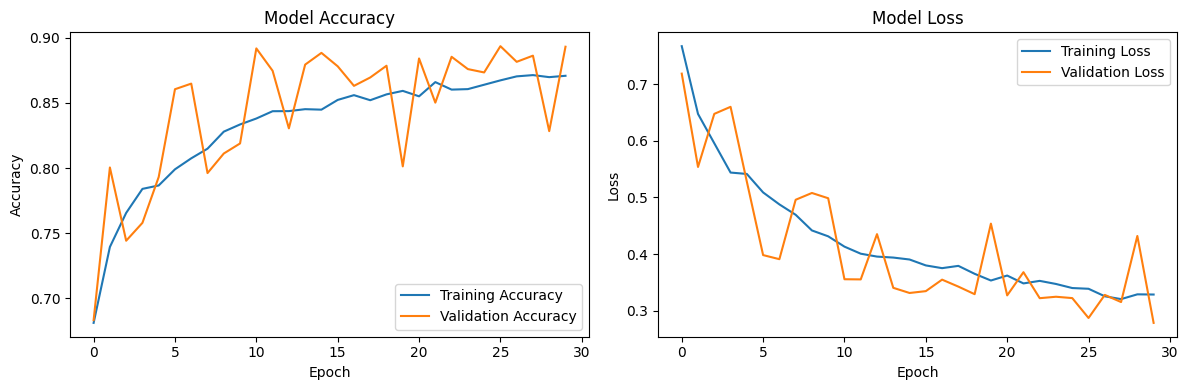

In [5]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 288ms/step


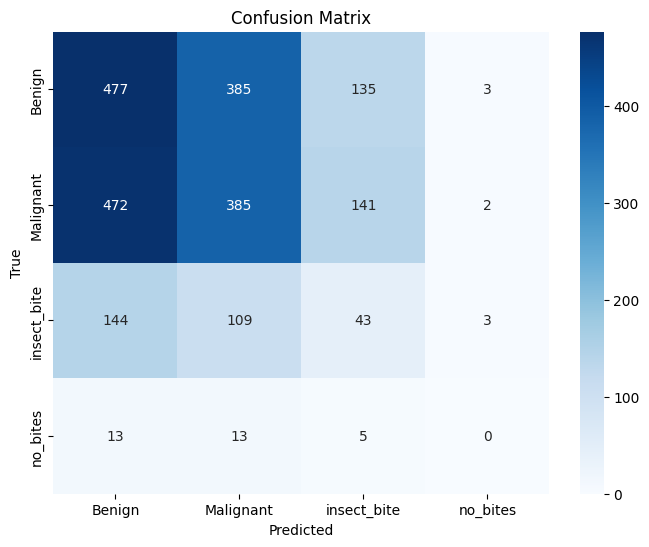


[STATUS] Classification Report:
              precision    recall  f1-score   support

      Benign       0.43      0.48      0.45      1000
   Malignant       0.43      0.39      0.41      1000
 insect_bite       0.13      0.14      0.14       299
    no_bites       0.00      0.00      0.00        31

    accuracy                           0.39      2330
   macro avg       0.25      0.25      0.25      2330
weighted avg       0.39      0.39      0.39      2330



In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load best saved model
model = tf.keras.models.load_model('best_model.h5')

# Get true and predicted labels
y_true = test_ds.classes
y_pred = np.argmax(model.predict(test_ds), axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=train_ds.class_indices.keys(), 
            yticklabels=train_ds.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')
plt.show()

# Classification Report
print("\n[STATUS] Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_ds.class_indices.keys()))

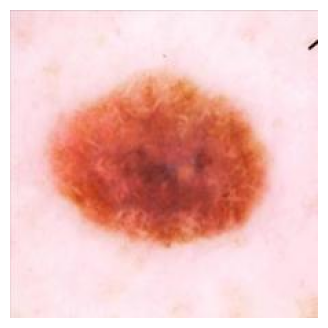

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step

PREDICTION RESULTS:
BENIGN      : 33.84%
MALIGNANT   : 66.16%
INSECT_BITE : 0.00%
NO_BITES    : 0.00%

➡ Most likely: malignant (66.2% confidence)


In [41]:
MODEL_PATH = "best_model.h5"  # Update this path
IMG_SIZE = (224, 224)  # Must match training dimensions
CLASS_NAMES = ['benign', 'malignant', 'insect_bite', 'no_bites']

def predict_and_show(img_path):
    """Display image with prediction progress"""
    # Load and display image
    img = image.load_img(img_path, target_size=IMG_SIZE)
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Preprocess and predict (with progress bar)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    pred = model.predict(img_array)  # Remove verbose=0 to show progress
    
    # Print results
    print("\nPREDICTION RESULTS:")
    for name, prob in zip(CLASS_NAMES, pred[0]):
        print(f"{name.upper():<12}: {prob*100:.2f}%")
    print(f"\n➡ Most likely: {CLASS_NAMES[np.argmax(pred[0])]} ({np.max(pred[0])*100:.1f}% confidence)")

# Function call example
predict_and_show(r"C:\Users\rithi\Downloads\Soft computing Project Resouces\skin_test\Malignant\6590.jpg")

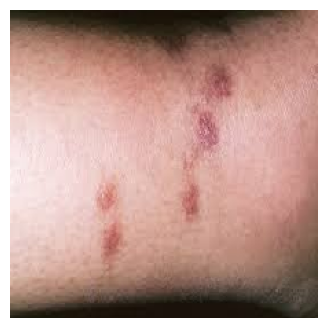

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

PREDICTION RESULTS:
BENIGN      : 0.00%
MALIGNANT   : 0.00%
INSECT_BITE : 99.40%
NO_BITES    : 0.59%

➡ Most likely: insect_bite (99.4% confidence)


In [42]:
predict_and_show(r"C:\Users\rithi\Downloads\Soft computing Project Resouces\skin_test\insect_bite\spidersimage1 - Copy (2).jpg")



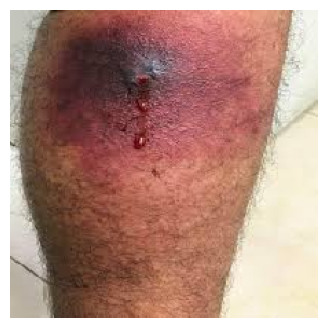

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step

PREDICTION RESULTS:
BENIGN      : 0.00%
MALIGNANT   : 0.00%
INSECT_BITE : 98.18%
NO_BITES    : 1.82%

➡ Most likely: insect_bite (98.2% confidence)


In [43]:
predict_and_show(r"C:\Users\rithi\Downloads\Soft computing Project Resouces\skin_test\insect_bite\es_spidersimage206 - Copy (2).jpg")

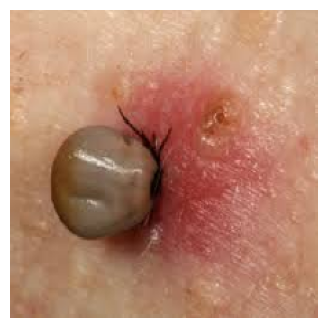

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

PREDICTION RESULTS:
BENIGN      : 0.06%
MALIGNANT   : 5.16%
INSECT_BITE : 94.57%
NO_BITES    : 0.21%

➡ Most likely: insect_bite (94.6% confidence)


In [44]:
predict_and_show(r"C:\Users\rithi\Downloads\Soft computing Project Resouces\skin_test\insect_bite\ticksimage417 - Copy (2).jpg")

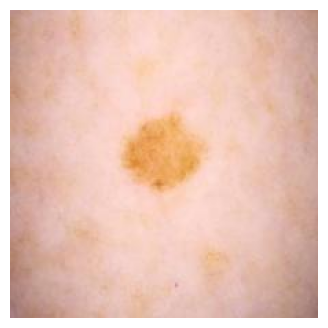

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

PREDICTION RESULTS:
BENIGN      : 99.99%
MALIGNANT   : 0.01%
INSECT_BITE : 0.00%
NO_BITES    : 0.00%

➡ Most likely: benign (100.0% confidence)


In [45]:
predict_and_show(r"C:\Users\rithi\Downloads\Soft computing Project Resouces\skin_test\Benign\7300.jpg")